# Assignment Module 4
# Ahmad Ali C1-04

## Load Dataset MNIST:-

In [1]:
import pandas as pd
df=pd.read_csv('mnist_train.csv')
X=df.drop('label',axis=1)
y=df['label']

## Getting shape and Normalize:-

In [11]:
X.shape

(60000, 784)

In [2]:
X=X/255

## Plot row=1

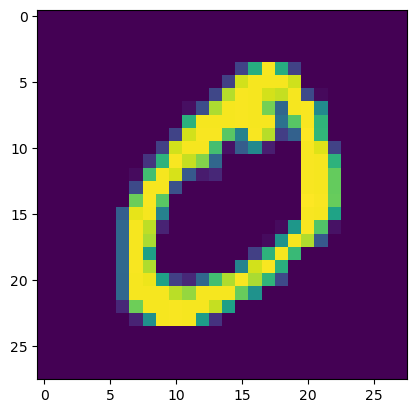

In [43]:
import numpy as np
a=np.array(X.iloc[1]).reshape(28,28)
plt.imshow(a)
plt.show()

# Model Training:-

In [3]:
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score,confusion_matrix

model=Sequential()

model.add(Dense(30,name='Input_Layer',activation='relu',input_shape=(28*28,)))

model.add(Dropout(name='Dropout_Layer',rate=0.2))

model.add(Dense(10,name='Output_Layer', activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=0.03), metrics=['accuracy'])

y_train_encoded = to_categorical(y)
print(y_train_encoded)

h=model.fit(X,y_train_encoded, batch_size=4000, epochs=40, validation_split=0.2)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Epoch 1/40
12/12 [==============================] - 3s 153ms/step - loss: 1.5891 - accuracy: 0.4344 - val_loss: 0.6251 - val_accuracy: 0.7996
Epoch 2/40
12/12 [==============================] - 1s 76ms/step - loss: 0.7855 - accuracy: 0.7328 - val_loss: 0.4384 - val_accuracy: 0.8691
Epoch 3/40
12/12 [==============================] - 1s 55ms/step - loss: 0.6071 - accuracy: 0.8012 - val_loss: 0.3403 - val_accuracy: 0.8989
Epoch 4/40
12/12 [==============================] - 1s 54ms/step - loss: 0.5318 - accuracy: 0.8243 - val_loss: 0.3034 - val_accuracy: 0.9105
Epoch 5/40
12/12 [==============================] - 1s 54ms/step - loss: 0.4875 - accuracy: 0.8393 - val_loss: 0.2858 - val_accuracy: 0.9146
Epoch 6/40
12/12 [==============================] - 1s 56ms/step - loss: 0.4639 - accuracy: 0.8491 - val_loss: 0.2690 - val_accuracy: 0.92

In [4]:
hist=pd.DataFrame(h.history)
hist

,loss,accuracy,val_loss,val_accuracy
0,1.589058,0.434417,0.625105,0.799583
1,0.785504,0.732771,0.438433,0.869083
2,0.607089,0.801208,0.340283,0.898917
3,0.531782,0.824271,0.303414,0.910500
4,0.487456,0.839292,0.285789,0.914583
5,0.463872,0.849063,0.269014,0.920583
6,0.439377,0.856146,0.257393,0.921833
7,0.425161,0.862792,0.248790,0.926167
8,0.413842,0.866063,0.245301,0.929250
9,0.406537,0.868688,0.241081,0.927667


# Plot Model Accuracy during training:-

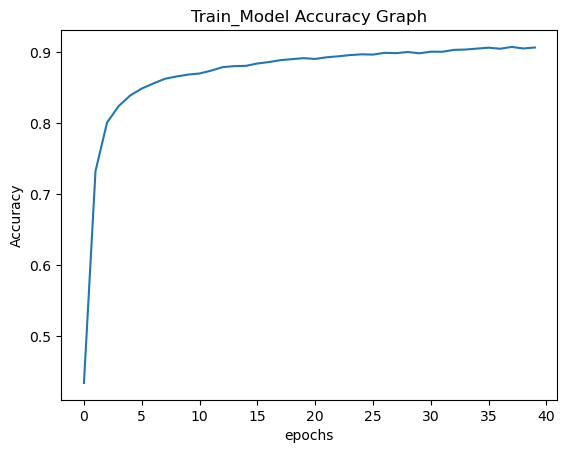

In [5]:
import matplotlib.pyplot as plt
plt.plot(hist.index,hist['accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Train_Model Accuracy Graph')
plt.show()

# Model Testing through Test Data:-

In [13]:
df_test=pd.read_csv('mnist_test.csv')
X_test=df_test.drop('label',axis=1)
X_test=X_test/255
y_test=df_test['label']

In [14]:
X_test.shape

(10000, 784)

## Model Accuracy and cf during testing:-

In [15]:
import numpy as np
y_pred=model.predict(X_test)

y_pred_1 = np.argmax(y_pred, axis=1)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_1)

print("Accuracy:", accuracy)
cf=confusion_matrix(y_test, y_pred_1)
print(cf)

313/313 [==============================] - 1s 2ms/step
Accuracy: 0.9434
[[ 966    1    2    0    2    2    4    1    2    0]
 [   0 1112    2    5    1    4    4    2    5    0]
 [   7    4  960   18    6    4   10    5   17    1]
 [   3    0   18  943    0   29    1   10    5    1]
 [   1    0    5    1  936    0   11    3    2   23]
 [   6    1    3   17    4  819   11    6   18    7]
 [  14    3    5    0    8   12  915    0    1    0]
 [   1    9   16   10    7    1    0  976    2    6]
 [  13    6    2   17    8   21    7    6  886    8]
 [   6    4    1    8   32   11    1   18    7  921]]


# Model Overview Graph:-

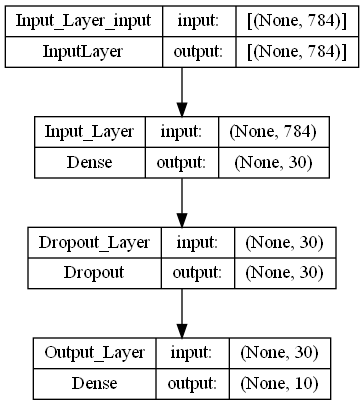

In [40]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True,rankdir='TB')

In [19]:
>>> model.layers[0].name

'Input_Layer'

In [20]:
>>> model.layers[1].name

'Dropout_Layer'

In [21]:
>>> model.layers[2].name

'Output_Layer'

## Plotting Model Weights and Biases of each layer:-

<Figure size 70000x800 with 0 Axes>

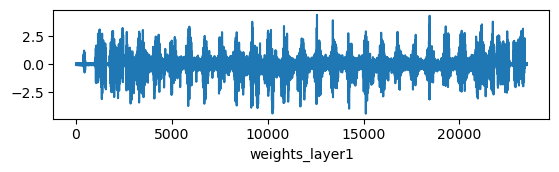

<Figure size 70000x800 with 0 Axes>

In [36]:
weights_layer1, biases_layer1 = model.layers[0].get_weights()
weights_layer3, biases_layer3 = model.layers[2].get_weights()

plt.subplot(3,1,1)
plt.plot(weights_layer1.reshape(-1))
plt.xlabel('weights_layer1')
plt.figure(figsize=(700,8))

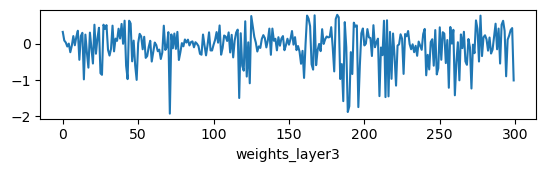

<Figure size 30000x7000 with 0 Axes>

In [35]:
plt.subplot(3,1,2)
plt.plot(weights_layer3.reshape(-1))
plt.xlabel('weights_layer3')
plt.figure(figsize=(300,70))
plt.show()

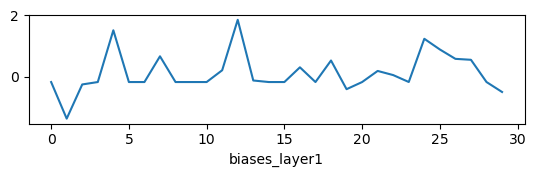

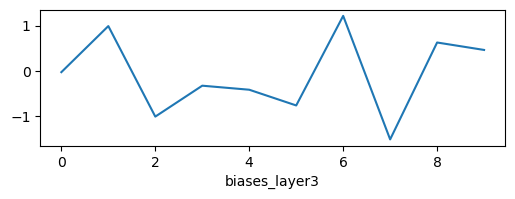

<Figure size 600x600 with 0 Axes>

In [42]:
plt.subplot(3,1,1)
plt.plot(biases_layer1)
plt.xlabel('biases_layer1')
plt.figure(figsize=(6,6))

plt.subplots_adjust(wspace=0.5)
plt.subplot(3,1,3)
plt.plot(biases_layer3)
plt.xlabel('biases_layer3')
plt.figure(figsize=(6,6))
plt.show()